In [1]:
import matplotlib.pyplot as plt
import numpy as np
from functions.CreateYarnGeneral import CreateYarn

In [2]:
!rm -r output/
!mkdir output/
!mkdir output/mesh
!mkdir output/ccx

In [3]:
# cualquier curva periodica puede ser describida por una serie de fourier

r = 5

trajs =[]  

fc1 = lambda x: np.sqrt(r**2 - x**2)

nq = 4
fc1 = lambda x: (r**nq - x**nq)**(1/nq)
x12 = np.linspace(0,r,2000)
y12 = fc1(x12)

trajs.append( np.array([x12,y12, np.zeros_like(x12)]).T )

# =============================================================================

fc1 = lambda x: -np.sqrt(r**2 - (x-2*r)**2) + 2*r
nq = 2
fc1 = lambda x: -(r**nq - (x-2*r)**nq)**(1/nq) + 2*r
x12 = np.linspace(r,2*r,2000)
y12 = fc1(x12)

trajs.append( np.array([x12,y12, np.zeros_like(x12)]).T )


In [4]:
trajs

[array([[0.00000000e+00, 5.00000000e+00, 0.00000000e+00],
        [2.50125063e-03, 5.00000000e+00, 0.00000000e+00],
        [5.00250125e-03, 5.00000000e+00, 0.00000000e+00],
        ...,
        [4.99499750e+00, 1.25711887e+00, 0.00000000e+00],
        [4.99749875e+00, 1.05730511e+00, 0.00000000e+00],
        [5.00000000e+00, 0.00000000e+00, 0.00000000e+00]]),
 array([[ 5.        , 10.        ,  0.        ],
        [ 5.00250125,  9.84186635,  0.        ],
        [ 5.0050025 ,  9.77639323,  0.        ],
        ...,
        [ 9.9949975 ,  5.0000025 ,  0.        ],
        [ 9.99749875,  5.00000063,  0.        ],
        [10.        ,  5.        ,  0.        ]])]

(np.float64(-0.5), np.float64(10.5), np.float64(-0.5), np.float64(10.5))

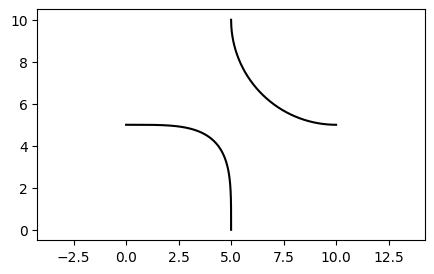

In [5]:

fig = plt.figure()
fig.set_size_inches(5, 3)
# compute fourier coefficients
for itraj in trajs:

    plt.plot(itraj[:,0], itraj[:,1], 'k')

plt.axis('equal')

In [6]:
radius = 1

for i,itraj in enumerate(trajs):

    file = "output/mesh/yarn_" + str(i) + ".brep"

    CreateYarn({"trajs": itraj, 
                "radius": radius, 
                "num_points": 20,
                "file": file})

In [7]:
from CompositeSandwich.CreateCompositeSandwich import CreateCompositeSandwich

In [8]:
params_mesh = {
    "files": ["output/mesh/yarn_0.brep", 
              "output/mesh/yarn_1.brep"],
    "inp_file": "output/mesh/sandwich.inp",
    "trajs": trajs,
    "radius": radius,
    "r": r
}

CreateCompositeSandwich(params_mesh);